# $\bar{x}$-r control chart

Average and Range charts $\bar{x}-r$ do not need to be tested against normality. The distribution of averages tends to normality (CL Theorem). Also, in practice, it provides good results even if there are slight deviations from normaity. The assumptions for independence and a sigle source of variation still hold.

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import Factors as fac
from scipy.stats import anderson
from scipy.stats import norm
import statistics
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Import data

In [2]:
dataset= np.genfromtxt('XBarR_Raw.csv', delimiter=',')
#print(dataset)
#print(dataset.shape)
dataset=np.delete(dataset,0,0)
dataset=np.delete(dataset,0,1)
#print(dataset)
#print(dataset.shape)

### Calculating $\bar{x}_i$ and $r_i$ per group

In [3]:
#subgroup size n, and number opf samples k:
n=dataset.shape[1]
k=dataset.shape[0]
#print(n,k)

In [4]:
x_bar=dataset.mean(axis=1)
#print(x_bar)

In [5]:
r=dataset.max(axis=1)-dataset.min(axis=1)
#print(r)

### Anderson-Darling normality test for $\bar{x}$

In [6]:
AD, cv, sl=anderson(x_bar)
if AD > cv[2]:
  print("Reject Ho: Data is not normal")
elif AD <= cv[2]:
  print("Cannot reject Ho: Data is normal")
print("Significance level is: ",sl[2], "%")

Reject Ho: Data is not normal
Significance level is:  5.0 %


### Probability plot

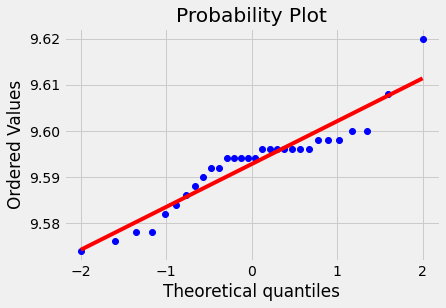

In [7]:
from scipy.stats import probplot
probplot(x_bar,dist="norm", plot=plt)
plt.show()

### Calculating control limits

In [8]:
xbarbar=statistics.mean(x_bar)

In [9]:
r_bar=statistics.mean(r)
#print(xbarbar, r_bar)

In [10]:
UCLx=xbarbar+(3/(fac.d2(n)*statistics.sqrt(n)))*r_bar
LCLx=xbarbar-(3/(fac.d2(n)*statistics.sqrt(n)))*r_bar
print(UCLx, xbarbar, LCLx)
UCLr=(1+3*(fac.d3(n)/fac.d2(n)))*r_bar
LCLr=(1-3*(fac.d3(n)/fac.d2(n)))*r_bar
if LCLr<0: 
    LCLr=0 # to avoid negative Lower control limit for ranges.
#print(UCLr, r_bar, LCLr)

9.607989111799009 9.5928 9.577610888200992


In [11]:
print("xbarbar= " + repr(xbarbar))
print("UCLx= " + repr(UCLx))
print("LCLx= " + repr(LCLx))
print("r_bar= " + repr(r_bar))
print("UCLr= " + repr(UCLr))
print("LCLr= " + repr(LCLr))

xbarbar= 9.5928
UCLx= 9.607989111799009
LCLx= 9.577610888200992
r_bar= 0.02633333333333283
UCLr= 0.055678131269703716
LCLr= 0


In [12]:
# Horizontal values
meas=np.linspace(1, x_bar.shape[0], x_bar.shape[0])
#print(meas)

In [13]:
uclx=np.full((x_bar.shape[0]), UCLx)
lclx=np.full((x_bar.shape[0]), LCLx)
Xbarbar=np.full((x_bar.shape[0]), xbarbar)
#print(uclx)

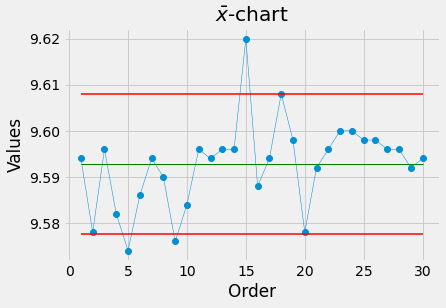

In [14]:
plt.figure(0)
#plt.subplot(211)
plt.plot(meas, x_bar, marker= 'o',linewidth=0.5)
plt.plot(meas,uclx, 'r-',linewidth=1.5)
plt.plot(meas,lclx, 'r-', linewidth=1.5)
plt.plot(meas,Xbarbar, 'g-', linewidth=1.0)
plt.xlabel('Order')
plt.ylabel("Values")
plt.title(r"$\bar{x}$-chart")
plt.show()

In [15]:
# Horizontal values
measr=np.linspace(1, r.shape[0], r.shape[0])
#print(meas)

In [16]:
Rbar=np.full((r.shape[0]), r_bar)
uclr=np.full((r.shape[0]), UCLr)
lclr=np.full((r.shape[0]), LCLr)

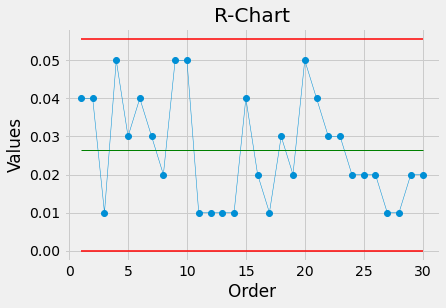

In [17]:
plt.figure(1)
#plt.subplot(211)
plt.plot(measr, r, marker= 'o',linewidth=0.5)
plt.plot(measr,uclr, 'r-', linewidth=1.5)
plt.plot(measr,lclr, 'r-', linewidth=1.5)
plt.plot(measr,Rbar, 'g-', linewidth=1.0)
plt.xlabel('Order')
plt.ylabel("Values")
plt.title("R-Chart")
plt.show()

## Plots in Bokeh

In [18]:
from bokeh.io import output_notebook, show, curdoc
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [19]:
f=figure(title="x-bar chart",plot_width=700, plot_height=400,x_axis_label='Order', 
         y_axis_label='Values')
f.line(meas, x_bar,color="blue", line_width=0.5)
f.circle(meas, x_bar,  fill_color="blue", size=8)
f.line(meas, lclx, color="red")
f.line(meas, Xbarbar, color="green")
f.line(meas, uclx, color="red")
show(f)

In [20]:
f=figure(title="r chart",plot_width=700, plot_height=400,x_axis_label='Order', 
         y_axis_label='Values')
f.line(measr, r,color="blue", line_width=0.5)
f.circle(measr, r,  fill_color="blue", size=8)
f.line(measr, lclr, color="red")
f.line(measr, Rbar, color="green")
f.line(measr, uclr, color="red")
show(f)